In [1]:
import tensorflow as tf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

C:\Users\hm\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [19]:
seq_length = 7
data_dim = 5
hidden_dim = 5
output_dim = 1
learning_rate = 0.01
iterations = 500
layer_size=3

In [3]:
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [4]:
x = np.loadtxt('E:\\amazone/x0916.csv', delimiter=',')
y = np.loadtxt('E:\\amazone/y16.csv', delimiter=',')
x_norm = MinMaxScaler(x).reshape([-1,seq_length, data_dim])
y_norm = MinMaxScaler(y).reshape([-1,output_dim])
print("X Shape: ", x_norm.shape)
print("Y Shape: ", y_norm.shape)

X Shape:  (423, 7, 5)
Y Shape:  (423, 1)


In [5]:
x_train = x_norm[:323,:,:]
y_train = y_norm[:323,:]
x_test = x_norm[323:,:,:]
y_test = y_norm[323:,:]
print("train X Y Shape", x_train.shape, y_train.shape)
print("test X Y Shape", x_test.shape, y_test.shape)

train X Y Shape (323, 7, 5) (323, 1)
test X Y Shape (100, 7, 5) (100, 1)


In [6]:
tmp = MinMaxScaler(x)
tmp[:,1]

array([0.02250192, 0.01971394, 0.0196591 , ..., 0.01584943, 0.0123388 ,
       0.01526602])

In [7]:
tf.reset_default_graph()
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

In [21]:
tf.reset_default_graph()

In [22]:
#cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.nn.softsign)
multi_cells = tf.contrib.rnn.MultiRNNCell([cell]*layer_size, state_is_tuple=True)
outputs, _states = tf.nn.dynamic_rnn(multi_cells, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(
    outputs[:, -1], output_dim, activation_fn=None)

ValueError: Tensor("rnn/Const:0", shape=(1,), dtype=int32) must be from the same graph as Tensor("ExpandDims:0", shape=(1,), dtype=int32).

In [9]:
loss = tf.reduce_sum(tf.square(Y_pred - Y))
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)

In [10]:
targets = tf.placeholder(tf.float32, [None, 1])
predictions = tf.placeholder(tf.float32, [None, 1])
rmse = tf.sqrt(tf.reduce_mean(tf.square(targets - predictions)))

[step: 0] loss: 46.373111724853516
[step: 1] loss: 22.58043670654297
[step: 2] loss: 23.869077682495117
[step: 3] loss: 18.83365821838379
[step: 4] loss: 8.788361549377441
[step: 5] loss: 3.513957977294922
[step: 6] loss: 5.742376804351807
[step: 7] loss: 6.600801944732666
[step: 8] loss: 3.5705788135528564
[step: 9] loss: 4.007412910461426
[step: 10] loss: 5.682740211486816
[step: 11] loss: 4.794976711273193
[step: 12] loss: 3.177976131439209
[step: 13] loss: 3.099640130996704
[step: 14] loss: 3.8938934803009033
[step: 15] loss: 3.9393274784088135
[step: 16] loss: 3.2396256923675537
[step: 17] loss: 2.740412950515747
[step: 18] loss: 2.794477701187134
[step: 19] loss: 3.0985300540924072
[step: 20] loss: 3.2682487964630127
[step: 21] loss: 3.1633622646331787
[step: 22] loss: 2.8886799812316895
[step: 23] loss: 2.647473096847534
[step: 24] loss: 2.581526279449463
[step: 25] loss: 2.67769193649292
[step: 26] loss: 2.7958786487579346
[step: 27] loss: 2.804797410964966
[step: 28] loss: 2.6

[step: 227] loss: 0.9752663969993591
[step: 228] loss: 0.9738543629646301
[step: 229] loss: 0.9724928736686707
[step: 230] loss: 0.9710965752601624
[step: 231] loss: 0.9696711897850037
[step: 232] loss: 0.9682826995849609
[step: 233] loss: 0.9668461084365845
[step: 234] loss: 0.9654258489608765
[step: 235] loss: 0.9640041589736938
[step: 236] loss: 0.9625478982925415
[step: 237] loss: 0.961115300655365
[step: 238] loss: 0.9596561193466187
[step: 239] loss: 0.9582009315490723
[step: 240] loss: 0.9567559957504272
[step: 241] loss: 0.9552955627441406
[step: 242] loss: 0.9538596272468567
[step: 243] loss: 0.9524118900299072
[step: 244] loss: 0.9509688019752502
[step: 245] loss: 0.9495257139205933
[step: 246] loss: 0.9480689167976379
[step: 247] loss: 0.9466190934181213
[step: 248] loss: 0.9451534748077393
[step: 249] loss: 0.9436912536621094
[step: 250] loss: 0.9422202706336975
[step: 251] loss: 0.9407450556755066
[step: 252] loss: 0.9392681121826172
[step: 253] loss: 0.9377798438072205
[s

[step: 451] loss: 0.6557409167289734
[step: 452] loss: 0.6544209718704224
[step: 453] loss: 0.6531333923339844
[step: 454] loss: 0.6518402695655823
[step: 455] loss: 0.6505742073059082
[step: 456] loss: 0.6493076682090759
[step: 457] loss: 0.6480568051338196
[step: 458] loss: 0.6468110084533691
[step: 459] loss: 0.645571768283844
[step: 460] loss: 0.6443415880203247
[step: 461] loss: 0.6431121826171875
[step: 462] loss: 0.6418929100036621
[step: 463] loss: 0.6406702995300293
[step: 464] loss: 0.6394556760787964
[step: 465] loss: 0.6382337808609009
[step: 466] loss: 0.6370176076889038
[step: 467] loss: 0.6357982158660889
[step: 468] loss: 0.6345849633216858
[step: 469] loss: 0.6333680748939514
[step: 470] loss: 0.6321561932563782
[step: 471] loss: 0.6309410333633423
[step: 472] loss: 0.6297296285629272
[step: 473] loss: 0.62851482629776
[step: 474] loss: 0.6273024678230286
[step: 475] loss: 0.6260876655578613
[step: 476] loss: 0.6248736381530762
[step: 477] loss: 0.6236562728881836
[ste

[step: 674] loss: 0.44006696343421936
[step: 675] loss: 0.4389769434928894
[step: 676] loss: 0.4378853440284729
[step: 677] loss: 0.43679338693618774
[step: 678] loss: 0.43570151925086975
[step: 679] loss: 0.43460750579833984
[step: 680] loss: 0.4335130453109741
[step: 681] loss: 0.43241915106773376
[step: 682] loss: 0.4313254952430725
[step: 683] loss: 0.43023091554641724
[step: 684] loss: 0.42913520336151123
[step: 685] loss: 0.42803749442100525
[step: 686] loss: 0.42693981528282166
[step: 687] loss: 0.4258403182029724
[step: 688] loss: 0.42473867535591125
[step: 689] loss: 0.4236338436603546
[step: 690] loss: 0.4225262999534607
[step: 691] loss: 0.4214158356189728
[step: 692] loss: 0.420301228761673
[step: 693] loss: 0.41918399930000305
[step: 694] loss: 0.4180646240711212
[step: 695] loss: 0.416943222284317
[step: 696] loss: 0.41581931710243225
[step: 697] loss: 0.4146929085254669
[step: 698] loss: 0.4135635197162628
[step: 699] loss: 0.41243186593055725
[step: 700] loss: 0.4112979

[step: 898] loss: 1.0805213451385498
[step: 899] loss: 1.079923152923584
[step: 900] loss: 1.0778956413269043
[step: 901] loss: 1.0772837400436401
[step: 902] loss: 1.0758864879608154
[step: 903] loss: 1.074500560760498
[step: 904] loss: 1.0738173723220825
[step: 905] loss: 1.0721945762634277
[step: 906] loss: 1.0712848901748657
[step: 907] loss: 1.0702482461929321
[step: 908] loss: 1.0688070058822632
[step: 909] loss: 1.0680017471313477
[step: 910] loss: 1.0667788982391357
[step: 911] loss: 1.065549373626709
[step: 912] loss: 1.0647026300430298
[step: 913] loss: 1.0634675025939941
[step: 914] loss: 1.0623666048049927
[step: 915] loss: 1.0614780187606812
[step: 916] loss: 1.060293436050415
[step: 917] loss: 1.0592362880706787
[step: 918] loss: 1.058323860168457
[step: 919] loss: 1.0571962594985962
[step: 920] loss: 1.0561387538909912
[step: 921] loss: 1.0552165508270264
[step: 922] loss: 1.0541521310806274
[step: 923] loss: 1.0530831813812256
[step: 924] loss: 1.0521440505981445
[step:

[step: 1118] loss: 0.8891146183013916
[step: 1119] loss: 0.8878172039985657
[step: 1120] loss: 0.8867123126983643
[step: 1121] loss: 0.8859764933586121
[step: 1122] loss: 0.8850716352462769
[step: 1123] loss: 0.8838610649108887
[step: 1124] loss: 0.8827561140060425
[step: 1125] loss: 0.8818999528884888
[step: 1126] loss: 0.8810117244720459
[step: 1127] loss: 0.8799181580543518
[step: 1128] loss: 0.8787640929222107
[step: 1129] loss: 0.877740204334259
[step: 1130] loss: 0.87682044506073
[step: 1131] loss: 0.8758543133735657
[step: 1132] loss: 0.8747783303260803
[step: 1133] loss: 0.8736448287963867
[step: 1134] loss: 0.8725452423095703
[step: 1135] loss: 0.8715072274208069
[step: 1136] loss: 0.8704990148544312
[step: 1137] loss: 0.8694778084754944
[step: 1138] loss: 0.8684130311012268
[step: 1139] loss: 0.8673122525215149
[step: 1140] loss: 0.8661841154098511
[step: 1141] loss: 0.8650485873222351
[step: 1142] loss: 0.8639090657234192
[step: 1143] loss: 0.8627721667289734
[step: 1144] lo

[step: 1335] loss: 0.8313513398170471
[step: 1336] loss: 0.8526769280433655
[step: 1337] loss: 0.8195310235023499
[step: 1338] loss: 0.8291734457015991
[step: 1339] loss: 0.8308810591697693
[step: 1340] loss: 0.8110452890396118
[step: 1341] loss: 0.8243883848190308
[step: 1342] loss: 0.8064067363739014
[step: 1343] loss: 0.810251772403717
[step: 1344] loss: 0.8117710947990417
[step: 1345] loss: 0.797797441482544
[step: 1346] loss: 0.8044729232788086
[step: 1347] loss: 0.7928877472877502
[step: 1348] loss: 0.7951351404190063
[step: 1349] loss: 0.7943729162216187
[step: 1350] loss: 0.7859318852424622
[step: 1351] loss: 0.7900186777114868
[step: 1352] loss: 0.7823379635810852
[step: 1353] loss: 0.7846376299858093
[step: 1354] loss: 0.7813168168067932
[step: 1355] loss: 0.7770106196403503
[step: 1356] loss: 0.7780131101608276
[step: 1357] loss: 0.7728305459022522
[step: 1358] loss: 0.7744516134262085
[step: 1359] loss: 0.769855260848999
[step: 1360] loss: 0.7693161964416504
[step: 1361] lo

[step: 1554] loss: 0.7087688446044922
[step: 1555] loss: 0.7759873867034912
[step: 1556] loss: 0.7018002271652222
[step: 1557] loss: 0.7459796071052551
[step: 1558] loss: 0.6943639516830444
[step: 1559] loss: 0.7293142676353455
[step: 1560] loss: 0.7016360759735107
[step: 1561] loss: 0.7172163724899292
[step: 1562] loss: 0.7013932466506958
[step: 1563] loss: 0.6985953450202942
[step: 1564] loss: 0.6916354298591614
[step: 1565] loss: 0.6825239658355713
[step: 1566] loss: 0.6868599653244019
[step: 1567] loss: 0.677264392375946
[step: 1568] loss: 0.6830055117607117
[step: 1569] loss: 0.6725268363952637
[step: 1570] loss: 0.676547646522522
[step: 1571] loss: 0.6651793718338013
[step: 1572] loss: 0.6696350574493408
[step: 1573] loss: 0.6617909073829651
[step: 1574] loss: 0.6659363508224487
[step: 1575] loss: 0.6587874889373779
[step: 1576] loss: 0.6606031060218811
[step: 1577] loss: 0.6545188426971436
[step: 1578] loss: 0.6542750000953674
[step: 1579] loss: 0.6514165997505188
[step: 1580] l

[step: 1774] loss: 0.553134560585022
[step: 1775] loss: 0.5527009963989258
[step: 1776] loss: 0.5523087382316589
[step: 1777] loss: 0.5515283942222595
[step: 1778] loss: 0.5508483052253723
[step: 1779] loss: 0.5504566431045532
[step: 1780] loss: 0.5499376058578491
[step: 1781] loss: 0.5492016077041626
[step: 1782] loss: 0.5486301183700562
[step: 1783] loss: 0.5481930375099182
[step: 1784] loss: 0.5476454496383667
[step: 1785] loss: 0.5469710230827332
[step: 1786] loss: 0.5464180707931519
[step: 1787] loss: 0.5459490418434143
[step: 1788] loss: 0.5454174876213074
[step: 1789] loss: 0.5447922945022583
[step: 1790] loss: 0.5442212224006653
[step: 1791] loss: 0.5437167882919312
[step: 1792] loss: 0.5432127118110657
[step: 1793] loss: 0.5426406264305115
[step: 1794] loss: 0.5420605540275574
[step: 1795] loss: 0.5415129661560059
[step: 1796] loss: 0.5410045385360718
[step: 1797] loss: 0.5404824018478394
[step: 1798] loss: 0.5399295091629028
[step: 1799] loss: 0.5393568873405457
[step: 1800] 

[step: 1992] loss: 0.5697758793830872
[step: 1993] loss: 0.5571776628494263
[step: 1994] loss: 0.5907232761383057
[step: 1995] loss: 0.5360484719276428
[step: 1996] loss: 0.5526626706123352
[step: 1997] loss: 0.525736391544342
[step: 1998] loss: 0.5446315407752991
[step: 1999] loss: 0.5404843688011169
[step: 2000] loss: 0.525349497795105
[step: 2001] loss: 0.5381546020507812
[step: 2002] loss: 0.5185127854347229
[step: 2003] loss: 0.5336285829544067
[step: 2004] loss: 0.5250815749168396
[step: 2005] loss: 0.5178235769271851
[step: 2006] loss: 0.5149324536323547
[step: 2007] loss: 0.5108702182769775
[step: 2008] loss: 0.5180655717849731
[step: 2009] loss: 0.5044527053833008
[step: 2010] loss: 0.5051928758621216
[step: 2011] loss: 0.5071583986282349
[step: 2012] loss: 0.5011067986488342
[step: 2013] loss: 0.5054869651794434
[step: 2014] loss: 0.5013677477836609
[step: 2015] loss: 0.4980785846710205
[step: 2016] loss: 0.49991869926452637
[step: 2017] loss: 0.496960312128067
[step: 2018] l

[step: 2207] loss: 1.1184431314468384
[step: 2208] loss: 0.5602659583091736
[step: 2209] loss: 0.7638294696807861
[step: 2210] loss: 0.716427206993103
[step: 2211] loss: 0.7142154574394226
[step: 2212] loss: 0.6267900466918945
[step: 2213] loss: 0.5644239187240601
[step: 2214] loss: 0.6565937995910645
[step: 2215] loss: 0.5504260063171387
[step: 2216] loss: 0.5724890828132629
[step: 2217] loss: 0.5594007968902588
[step: 2218] loss: 0.5291825532913208
[step: 2219] loss: 0.5830274820327759
[step: 2220] loss: 0.5306479930877686
[step: 2221] loss: 0.5075762867927551
[step: 2222] loss: 0.49142807722091675
[step: 2223] loss: 0.5248655676841736
[step: 2224] loss: 0.5009765625
[step: 2225] loss: 0.4743175208568573
[step: 2226] loss: 0.4921170175075531
[step: 2227] loss: 0.4907219111919403
[step: 2228] loss: 0.4839403033256531
[step: 2229] loss: 0.471126914024353
[step: 2230] loss: 0.4645395278930664
[step: 2231] loss: 0.47368788719177246
[step: 2232] loss: 0.4701208472251892
[step: 2233] loss:

[step: 2425] loss: 0.849602460861206
[step: 2426] loss: 1.1772162914276123
[step: 2427] loss: 0.9060304760932922
[step: 2428] loss: 0.46773210167884827
[step: 2429] loss: 0.5780181288719177
[step: 2430] loss: 0.8030757308006287
[step: 2431] loss: 0.6009414196014404
[step: 2432] loss: 0.44305965304374695
[step: 2433] loss: 0.5686991810798645
[step: 2434] loss: 0.5044631958007812
[step: 2435] loss: 0.4187262952327728
[step: 2436] loss: 0.5307943224906921
[step: 2437] loss: 0.5136873722076416
[step: 2438] loss: 0.39262184500694275
[step: 2439] loss: 0.47991886734962463
[step: 2440] loss: 0.4491536021232605
[step: 2441] loss: 0.4073326885700226
[step: 2442] loss: 0.4600541591644287
[step: 2443] loss: 0.41937679052352905
[step: 2444] loss: 0.40768590569496155
[step: 2445] loss: 0.42619436979293823
[step: 2446] loss: 0.41145071387290955
[step: 2447] loss: 0.403418630361557
[step: 2448] loss: 0.4051981568336487
[step: 2449] loss: 0.4116571545600891
[step: 2450] loss: 0.3861680030822754
[step:

[step: 2640] loss: 0.4951070249080658
[step: 2641] loss: 0.49436789751052856
[step: 2642] loss: 0.4897620677947998
[step: 2643] loss: 0.486528217792511
[step: 2644] loss: 0.48601800203323364
[step: 2645] loss: 0.47871965169906616
[step: 2646] loss: 0.4755564033985138
[step: 2647] loss: 0.4766474962234497
[step: 2648] loss: 0.4721704125404358
[step: 2649] loss: 0.4670850336551666
[step: 2650] loss: 0.4631573557853699
[step: 2651] loss: 0.4573853611946106
[step: 2652] loss: 0.45376086235046387
[step: 2653] loss: 0.4535190165042877
[step: 2654] loss: 0.45187821984291077
[step: 2655] loss: 0.4495805501937866
[step: 2656] loss: 0.448489785194397
[step: 2657] loss: 0.4463675618171692
[step: 2658] loss: 0.44366011023521423
[step: 2659] loss: 0.44220736622810364
[step: 2660] loss: 0.4409959614276886
[step: 2661] loss: 0.4386844038963318
[step: 2662] loss: 0.43624693155288696
[step: 2663] loss: 0.4347365200519562
[step: 2664] loss: 0.43350309133529663
[step: 2665] loss: 0.43199679255485535
[ste

[step: 2856] loss: 0.3947611153125763
[step: 2857] loss: 0.4031354784965515
[step: 2858] loss: 0.39090695977211
[step: 2859] loss: 0.39704447984695435
[step: 2860] loss: 0.38879942893981934
[step: 2861] loss: 0.3903144896030426
[step: 2862] loss: 0.3837968409061432
[step: 2863] loss: 0.38299527764320374
[step: 2864] loss: 0.38022851943969727
[step: 2865] loss: 0.376761257648468
[step: 2866] loss: 0.3806050717830658
[step: 2867] loss: 0.3739748001098633
[step: 2868] loss: 0.37521952390670776
[step: 2869] loss: 0.3701139986515045
[step: 2870] loss: 0.3691410720348358
[step: 2871] loss: 0.36809250712394714
[step: 2872] loss: 0.3655892312526703
[step: 2873] loss: 0.366792231798172
[step: 2874] loss: 0.36357077956199646
[step: 2875] loss: 0.36281725764274597
[step: 2876] loss: 0.36142951250076294
[step: 2877] loss: 0.3592536747455597
[step: 2878] loss: 0.3588114082813263
[step: 2879] loss: 0.35656702518463135
[step: 2880] loss: 0.3556572198867798
[step: 2881] loss: 0.3548648953437805
[step:

[step: 3073] loss: 0.2663848400115967
[step: 3074] loss: 0.2680303454399109
[step: 3075] loss: 0.26750680804252625
[step: 3076] loss: 0.2649487853050232
[step: 3077] loss: 0.263609379529953
[step: 3078] loss: 0.26417309045791626
[step: 3079] loss: 0.26485636830329895
[step: 3080] loss: 0.2638219892978668
[step: 3081] loss: 0.2620218098163605
[step: 3082] loss: 0.26100119948387146
[step: 3083] loss: 0.2612857520580292
[step: 3084] loss: 0.2616633474826813
[step: 3085] loss: 0.26135993003845215
[step: 3086] loss: 0.2603299617767334
[step: 3087] loss: 0.25912973284721375
[step: 3088] loss: 0.25831085443496704
[step: 3089] loss: 0.2581126093864441
[step: 3090] loss: 0.2581954300403595
[step: 3091] loss: 0.2581675350666046
[step: 3092] loss: 0.2578970193862915
[step: 3093] loss: 0.2573341429233551
[step: 3094] loss: 0.2565712630748749
[step: 3095] loss: 0.2557910680770874
[step: 3096] loss: 0.25514018535614014
[step: 3097] loss: 0.2545851171016693
[step: 3098] loss: 0.254144549369812
[step:

[step: 3288] loss: 0.2378523200750351
[step: 3289] loss: 0.24287159740924835
[step: 3290] loss: 0.23790033161640167
[step: 3291] loss: 0.23683717846870422
[step: 3292] loss: 0.23599374294281006
[step: 3293] loss: 0.23139774799346924
[step: 3294] loss: 0.2353752851486206
[step: 3295] loss: 0.22619350254535675
[step: 3296] loss: 0.23196114599704742
[step: 3297] loss: 0.222762331366539
[step: 3298] loss: 0.23117688298225403
[step: 3299] loss: 0.21944743394851685
[step: 3300] loss: 0.22598260641098022
[step: 3301] loss: 0.21895766258239746
[step: 3302] loss: 0.2241564244031906
[step: 3303] loss: 0.2186565101146698
[step: 3304] loss: 0.21818086504936218
[step: 3305] loss: 0.21777008473873138
[step: 3306] loss: 0.21541306376457214
[step: 3307] loss: 0.21817313134670258
[step: 3308] loss: 0.2129090279340744
[step: 3309] loss: 0.21483033895492554
[step: 3310] loss: 0.21217310428619385
[step: 3311] loss: 0.21254438161849976
[step: 3312] loss: 0.2124316394329071
[step: 3313] loss: 0.209858179092

[step: 3501] loss: 0.17361481487751007
[step: 3502] loss: 0.1759548783302307
[step: 3503] loss: 0.17772996425628662
[step: 3504] loss: 0.1742740273475647
[step: 3505] loss: 0.17717666923999786
[step: 3506] loss: 0.17944994568824768
[step: 3507] loss: 0.17715133726596832
[step: 3508] loss: 0.18183034658432007
[step: 3509] loss: 0.1846497803926468
[step: 3510] loss: 0.1856158822774887
[step: 3511] loss: 0.19065891206264496
[step: 3512] loss: 0.20050227642059326
[step: 3513] loss: 0.200020894408226
[step: 3514] loss: 0.2092680037021637
[step: 3515] loss: 0.21475611627101898
[step: 3516] loss: 0.21927312016487122
[step: 3517] loss: 0.21888019144535065
[step: 3518] loss: 0.2211155891418457
[step: 3519] loss: 0.19708852469921112
[step: 3520] loss: 0.1858723908662796
[step: 3521] loss: 0.17496058344841003
[step: 3522] loss: 0.16682223975658417
[step: 3523] loss: 0.17469310760498047
[step: 3524] loss: 0.1845092475414276
[step: 3525] loss: 0.18824057281017303
[step: 3526] loss: 0.19930717349052

[step: 3716] loss: 0.2560655176639557
[step: 3717] loss: 0.5062583684921265
[step: 3718] loss: 0.630992591381073
[step: 3719] loss: 0.839268147945404
[step: 3720] loss: 0.8850067853927612
[step: 3721] loss: 0.3014296591281891
[step: 3722] loss: 0.4121714234352112
[step: 3723] loss: 0.46267247200012207
[step: 3724] loss: 0.4460952579975128
[step: 3725] loss: 0.34659773111343384
[step: 3726] loss: 0.29085955023765564
[step: 3727] loss: 0.355659157037735
[step: 3728] loss: 0.25621581077575684
[step: 3729] loss: 0.2852320373058319
[step: 3730] loss: 0.2682543992996216
[step: 3731] loss: 0.2580738365650177
[step: 3732] loss: 0.23280659317970276
[step: 3733] loss: 0.23655818402767181
[step: 3734] loss: 0.20228774845600128
[step: 3735] loss: 0.24932444095611572
[step: 3736] loss: 0.20226174592971802
[step: 3737] loss: 0.2290066033601761
[step: 3738] loss: 0.179424449801445
[step: 3739] loss: 0.20292267203330994
[step: 3740] loss: 0.18787439167499542
[step: 3741] loss: 0.17555534839630127
[ste

[step: 3928] loss: 0.11760343611240387
[step: 3929] loss: 0.12103719264268875
[step: 3930] loss: 0.130512073636055
[step: 3931] loss: 0.1655290126800537
[step: 3932] loss: 0.21881335973739624
[step: 3933] loss: 0.3348407447338104
[step: 3934] loss: 0.37549230456352234
[step: 3935] loss: 0.3708674907684326
[step: 3936] loss: 0.20668382942676544
[step: 3937] loss: 0.26028749346733093
[step: 3938] loss: 0.25142019987106323
[step: 3939] loss: 0.27484777569770813
[step: 3940] loss: 0.3178619146347046
[step: 3941] loss: 0.1394764930009842
[step: 3942] loss: 0.26811280846595764
[step: 3943] loss: 0.29786309599876404
[step: 3944] loss: 0.25570791959762573
[step: 3945] loss: 0.3465697467327118
[step: 3946] loss: 0.15593644976615906
[step: 3947] loss: 0.2900876998901367
[step: 3948] loss: 0.2312518209218979
[step: 3949] loss: 0.20251165330410004
[step: 3950] loss: 0.21980790793895721
[step: 3951] loss: 0.18195566534996033
[step: 3952] loss: 0.23101134598255157
[step: 3953] loss: 0.14144040644168

[step: 4142] loss: 0.2631497085094452
[step: 4143] loss: 0.17609946429729462
[step: 4144] loss: 0.13125012814998627
[step: 4145] loss: 0.18366029858589172
[step: 4146] loss: 0.15630890429019928
[step: 4147] loss: 0.21460022032260895
[step: 4148] loss: 0.22654564678668976
[step: 4149] loss: 0.1409187763929367
[step: 4150] loss: 0.22263681888580322
[step: 4151] loss: 0.2188325822353363
[step: 4152] loss: 0.20121680200099945
[step: 4153] loss: 0.21525748074054718
[step: 4154] loss: 0.13288183510303497
[step: 4155] loss: 0.1795790046453476
[step: 4156] loss: 0.13883043825626373
[step: 4157] loss: 0.1415891796350479
[step: 4158] loss: 0.1434139907360077
[step: 4159] loss: 0.10642249882221222
[step: 4160] loss: 0.13733376562595367
[step: 4161] loss: 0.12562574446201324
[step: 4162] loss: 0.13403531908988953
[step: 4163] loss: 0.11652954667806625
[step: 4164] loss: 0.10169010609388351
[step: 4165] loss: 0.13217754662036896
[step: 4166] loss: 0.101105697453022
[step: 4167] loss: 0.118273682892

[step: 4356] loss: 0.08424903452396393
[step: 4357] loss: 0.07012904435396194
[step: 4358] loss: 0.06392132490873337
[step: 4359] loss: 0.06847570836544037
[step: 4360] loss: 0.07926767319440842
[step: 4361] loss: 0.09012813121080399
[step: 4362] loss: 0.09400199353694916
[step: 4363] loss: 0.09911522269248962
[step: 4364] loss: 0.09079103916883469
[step: 4365] loss: 0.08296456187963486
[step: 4366] loss: 0.06949383020401001
[step: 4367] loss: 0.06365945935249329
[step: 4368] loss: 0.06490787863731384
[step: 4369] loss: 0.06909076869487762
[step: 4370] loss: 0.07642513513565063
[step: 4371] loss: 0.08358597010374069
[step: 4372] loss: 0.09217888116836548
[step: 4373] loss: 0.09360475838184357
[step: 4374] loss: 0.09607334434986115
[step: 4375] loss: 0.08983157575130463
[step: 4376] loss: 0.08593636751174927
[step: 4377] loss: 0.07452218234539032
[step: 4378] loss: 0.06605901569128036
[step: 4379] loss: 0.061582718044519424
[step: 4380] loss: 0.06207339093089104
[step: 4381] loss: 0.065

[step: 4570] loss: 0.10274060815572739
[step: 4571] loss: 0.15257297456264496
[step: 4572] loss: 0.17459577322006226
[step: 4573] loss: 0.2072393000125885
[step: 4574] loss: 0.14828646183013916
[step: 4575] loss: 0.08923204243183136
[step: 4576] loss: 0.07928822189569473
[step: 4577] loss: 0.11738567054271698
[step: 4578] loss: 0.16271232068538666
[step: 4579] loss: 0.11214622855186462
[step: 4580] loss: 0.08512722700834274
[step: 4581] loss: 0.11572712659835815
[step: 4582] loss: 0.11064281314611435
[step: 4583] loss: 0.10906637459993362
[step: 4584] loss: 0.0623466856777668
[step: 4585] loss: 0.0731489285826683
[step: 4586] loss: 0.09408203512430191
[step: 4587] loss: 0.05811456963419914
[step: 4588] loss: 0.06930182129144669
[step: 4589] loss: 0.08293186873197556
[step: 4590] loss: 0.065943144261837
[step: 4591] loss: 0.06475599855184555
[step: 4592] loss: 0.06253943592309952
[step: 4593] loss: 0.07360205054283142
[step: 4594] loss: 0.06748706847429276
[step: 4595] loss: 0.053734276

[step: 4781] loss: 0.06797762960195541
[step: 4782] loss: 0.061396244913339615
[step: 4783] loss: 0.08776715397834778
[step: 4784] loss: 0.1212099939584732
[step: 4785] loss: 0.08128015697002411
[step: 4786] loss: 0.05830445885658264
[step: 4787] loss: 0.08099856227636337
[step: 4788] loss: 0.08496425300836563
[step: 4789] loss: 0.06677160412073135
[step: 4790] loss: 0.04122697934508324
[step: 4791] loss: 0.0659697949886322
[step: 4792] loss: 0.0627918690443039
[step: 4793] loss: 0.045670848339796066
[step: 4794] loss: 0.04858747124671936
[step: 4795] loss: 0.05760060250759125
[step: 4796] loss: 0.04554224759340286
[step: 4797] loss: 0.04174593463540077
[step: 4798] loss: 0.0454411506652832
[step: 4799] loss: 0.04797350615262985
[step: 4800] loss: 0.04097968712449074
[step: 4801] loss: 0.040722984820604324
[step: 4802] loss: 0.046281296759843826
[step: 4803] loss: 0.04751111939549446
[step: 4804] loss: 0.0399491973221302
[step: 4805] loss: 0.04301097244024277
[step: 4806] loss: 0.04655

[step: 4991] loss: 0.03367822989821434
[step: 4992] loss: 0.04078979045152664
[step: 4993] loss: 0.031703345477581024
[step: 4994] loss: 0.03804904967546463
[step: 4995] loss: 0.037138354033231735
[step: 4996] loss: 0.04041282460093498
[step: 4997] loss: 0.03826652467250824
[step: 4998] loss: 0.03837522119283676
[step: 4999] loss: 0.03789706155657768
RMSE: 0.059057340025901794


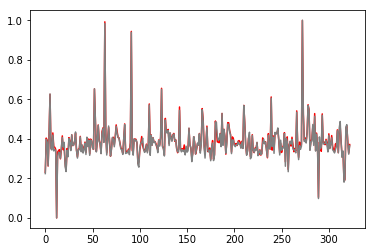

In [13]:
with tf.Session() as sess:
#     tf.reset_default_graph()
    init = tf.global_variables_initializer()
    sess.run(init)

    # Training step
    for i in range(iterations):
        _, step_loss, pred = sess.run([train, loss, Y_pred], feed_dict={
                                X: x_train, Y: y_train})
        print("[step: {}] loss: {}".format(i, step_loss))

    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: x_test})
    rmse_val = sess.run(rmse, feed_dict={
                    targets: y_test, predictions: test_predict})
    print("RMSE: {}".format(rmse_val))
    
    plt.plot(pred, 'r')
    plt.plot(y_train, 'grey')

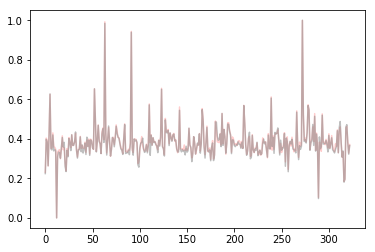

In [14]:
plt.plot(pred, 'r' ,alpha=0.2)
plt.plot(y_train, 'grey',alpha=0.5)

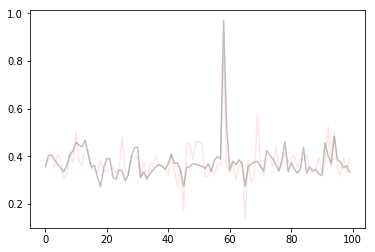

In [15]:
plt.plot(test_predict, 'r' ,alpha=0.1)
plt.plot(y_test, 'grey',alpha=0.5)

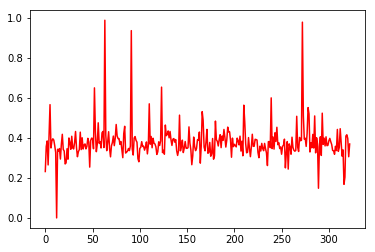

In [18]:
    plt.plot(pred, 'r')

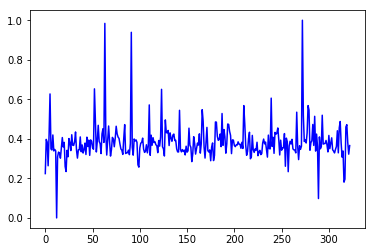

In [19]:
   plt.plot(y_train, 'b')

In [76]:
y_train.shape

(323, 1)

In [80]:
train_pred[0]

array([[ 5.00685722e-02],
       [-4.10929024e-02],
       [-6.11326471e-02],
       [ 5.15271276e-02],
       [-1.55648619e-01],
       [-3.06044631e-02],
       [ 5.78232110e-02],
       [ 2.62083896e-02],
       [ 5.01899309e-02],
       [ 1.46631794e-02],
       [-2.86684372e-02],
       [-3.93530801e-02],
       [-5.63274212e-02],
       [-3.52026150e-02],
       [ 2.23676711e-02],
       [-2.37763636e-02],
       [ 5.86481094e-02],
       [-3.30538228e-02],
       [-3.79800647e-02],
       [-1.60404500e-02],
       [-2.66300291e-02],
       [-2.12738756e-02],
       [ 7.01994300e-02],
       [-2.96880975e-02],
       [-2.74342410e-02],
       [ 1.49717815e-02],
       [ 9.75511968e-03],
       [-4.86188643e-02],
       [-2.08432339e-02],
       [ 1.33199990e-02],
       [-3.94493416e-02],
       [ 4.39155847e-04],
       [ 4.40618917e-02],
       [-2.47845221e-02],
       [ 2.08798051e-02],
       [-8.30221325e-02],
       [ 1.16243586e-02],
       [-1.55948587e-02],
       [-3.1